In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read the data and check its basic layout.
sales = pd.read_csv("MVA_Vehicle_Sales_Counts_by_Month_for_Calendar_Year_2002_through_November_2024.csv")
sales.head()

,Year,Month,New,Used,Total Sales New,Total Sales Used
0,2002,JAN,31106,49927,755015820,386481929
1,2002,FEB,27520,50982,664454223,361353242
2,2002,MAR,34225,58794,805666244,419385387
3,2002,APR,36452,59817,846368297,433061150
4,2002,MAY,37359,60577,855005784,442569410


In [3]:
# get more details about the data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              275 non-null    int64 
 1   Month             275 non-null    object
 2   New               275 non-null    int64 
 3   Used              275 non-null    int64 
 4   Total Sales New   275 non-null    int64 
 5   Total Sales Used  275 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 13.0+ KB


In [4]:
# Check the number and names of the columns present in the dataset
sales.columns

Index(['Year ', 'Month ', 'New', 'Used', 'Total Sales New',
       'Total Sales Used'],
      dtype='object')

In [5]:
# Clean column names by stripping whitespace
sales.columns = sales.columns.str.strip()

In [6]:
# Group data by year for annual analysis
annual_data = sales.groupby('Year')[['New', 'Used']].sum().reset_index()

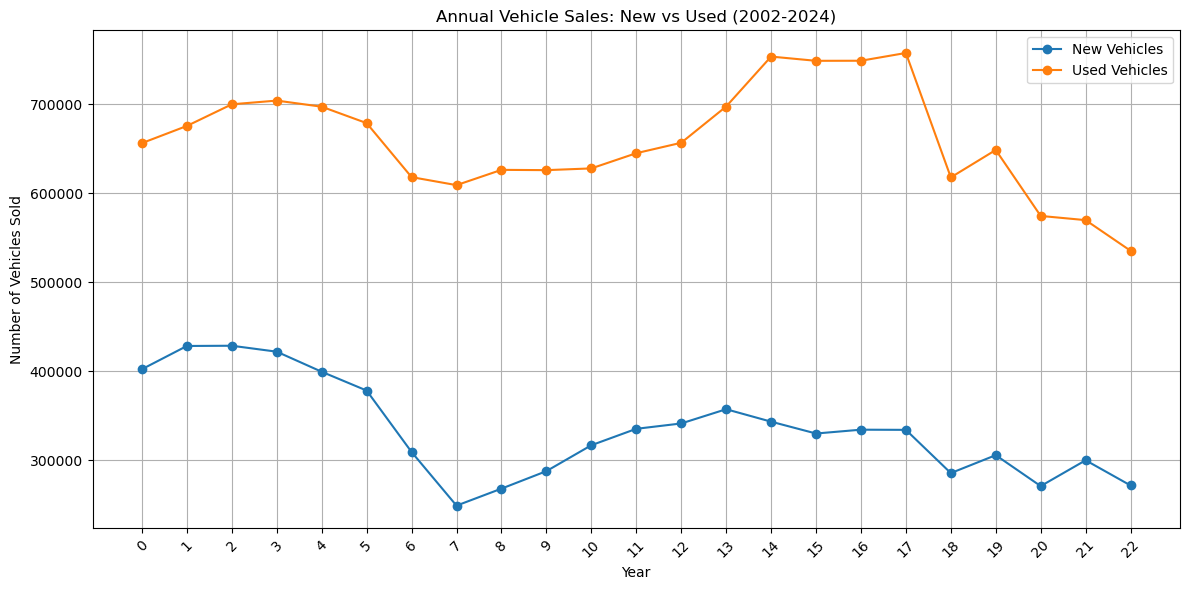

In [7]:
# Visualization 1: Check the Annual Sales Trend (New vs Used)
plt.figure(figsize=(12, 6))

# Plot annual trends
plt.plot(annual_data.index, annual_data['New'], marker='o', label='New Vehicles')
plt.plot(annual_data.index, annual_data['Used'], marker='o', label='Used Vehicles')

plt.title('Annual Vehicle Sales: New vs Used (2002-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Sold')
plt.xticks(annual_data.index, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show();

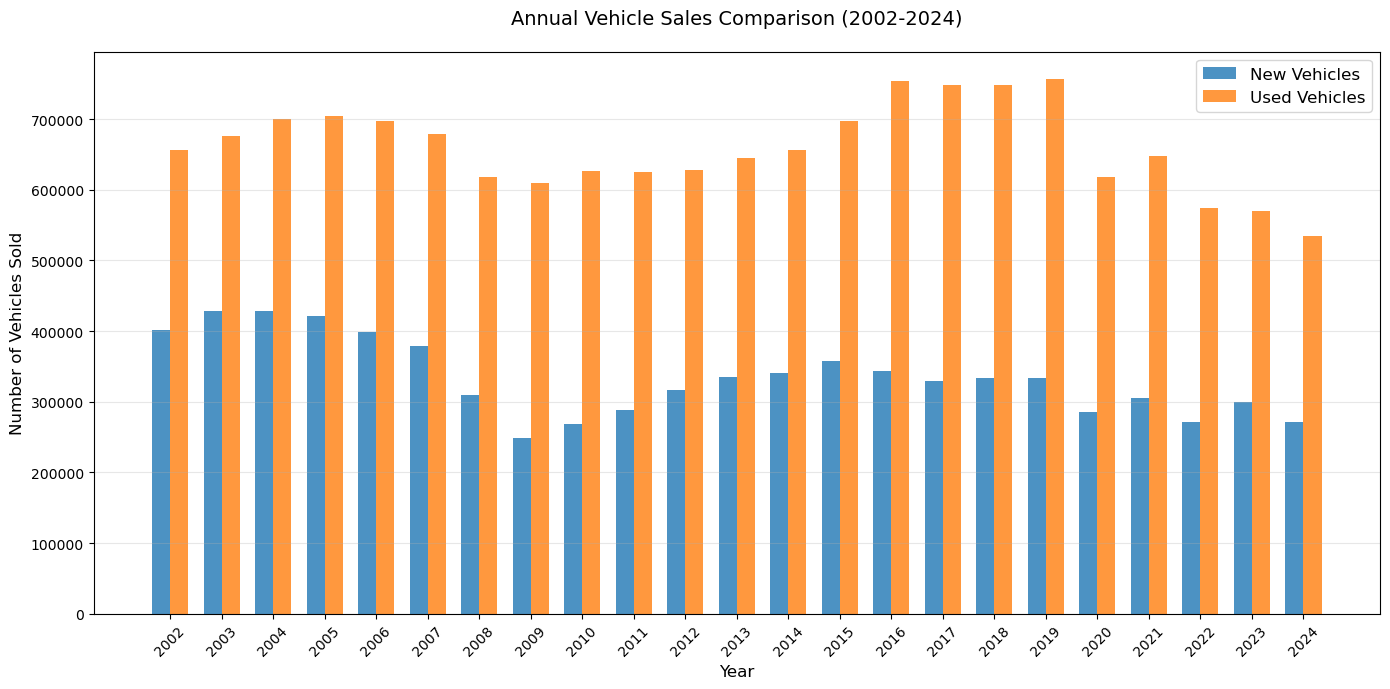

In [8]:
# Visualization 2: Annual Sales Comparison (Grouped Bar Chart)
plt.figure(figsize=(14, 7))

# Set bar positions and width
bar_width = 0.35
x = annual_data['Year']
x1 = [val - bar_width/2 for val in x]
x2 = [val + bar_width/2 for val in x]

plt.bar(x1, annual_data['New'], width=bar_width, label='New Vehicles', alpha=0.8)
plt.bar(x2, annual_data['Used'], width=bar_width, label='Used Vehicles', alpha=0.8)

plt.title('Annual Vehicle Sales Comparison (2002-2024)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Vehicles Sold', fontsize=12)
plt.xticks(x, rotation=45)
plt.legend(fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

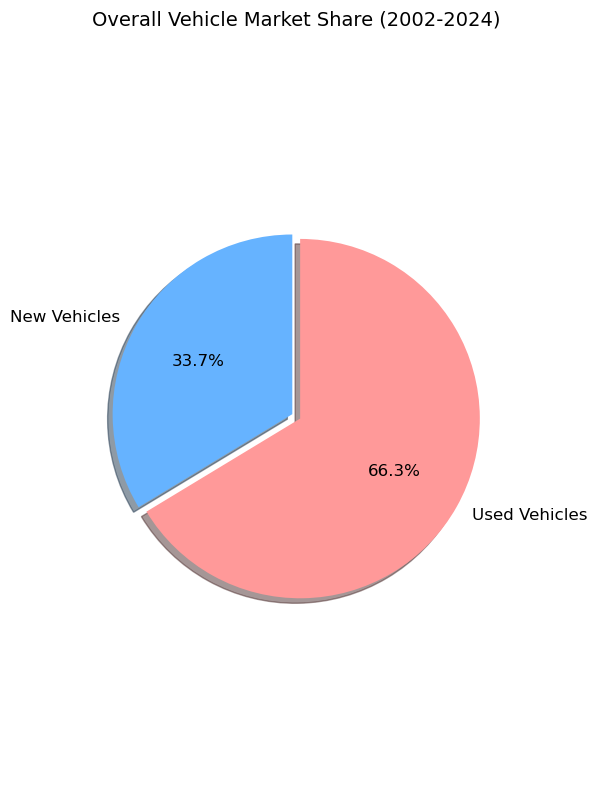

In [11]:
# Visualization 3: Overall Market Share Pie Chart
plt.figure(figsize=(6, 8))

# Calculate total new and used vehicles across all years
total_new = annual_data['New'].sum()
total_used = annual_data['Used'].sum()

# Create pie chart
labels = ['New Vehicles', 'Used Vehicles']
sizes = [total_new, total_used]
colors = ['#66b3ff', '#ff9999']
explode = (0.05, 0)  # Explode the 1st slice (New Vehicles)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,
        textprops={'fontsize': 12})
plt.title('Overall Vehicle Market Share (2002-2024)', fontsize=14, pad=20)
plt.axis('equal')  # Equal aspect ratio ensures circular pie
plt.tight_layout()
plt.show()